<a href="https://colab.research.google.com/github/vyshakh19/vyshakh_INFO5731_spring2020/blob/master/Copy_of_INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import pandas as pd
from gensim.models import Phrases
from gensim import corpora, models
from nltk.tokenize import word_tokenize
ngram_phrases = Phrases()
data_frame = pd.read_csv("/content/Processed_data.csv")
data_frame['tokenized_words'] = data_frame["Processed Text"].apply(lambda value: word_tokenize(value))
tokenized_words = data_frame['tokenized_words'].to_list()
bigram_phrases = models.Phrases(tokenized_words, min_count=1)
bi_models = models.phrases.Phraser(bigram_phrases)
tri_models = models.phrases.Phraser(models.Phrases(bigram_phrases[tokenized_words]))


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [0]:
from collections import Counter
words = []
data_frame['bigrams_words'] = data_frame["tokenized_words"].apply(lambda value: bi_models[value])
for bi_list in data_frame['bigrams_words'].to_list():
  for word in bi_list:
    words.append(word)
features = [bi_word for bi_word in words if "_" in bi_word]
Counter(features)

Counter({'absolut_love': 2,
         'aw_aw': 1,
         'batteri_life': 2,
         'best_laptop': 2,
         'brand_new': 4,
         'buyer_bewar': 2,
         'call_dell': 2,
         'dell_best': 2,
         'dell_tech': 2,
         'difficult_see': 2,
         'easi_use': 2,
         'everyth_els': 2,
         'fan_nois': 2,
         'fast_quiet': 2,
         'give_star': 2,
         'hard_drive': 5,
         'laptop_ok': 2,
         'like_one': 2,
         'loud_fan': 2,
         'mbp_download': 2,
         'microsoft_offic': 2,
         'nice_screen': 2,
         'nois_fan': 2,
         'old_laptop': 1,
         'one_month': 2,
         'optic_drive': 2,
         'person_busi': 2,
         'price_good': 2,
         'realli_fast': 1,
         'recommend_laptop': 1,
         'run_background': 2,
         'run_realli': 2,
         'scam_money': 2,
         'screen_qualiti': 1,
         'set_easi': 2,
         'singl_incid': 2,
         'softwar_support': 2,
         'ssd_one': 2

In [0]:

id2word = corpora.Dictionary(bi_models[tokenized_words])

corpus = [id2word.doc2bow(text) for text in bi_models[tokenized_words]]

In [0]:
from pprint import pprint
lda = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           update_every=1,
                                           random_state=100,
                                           passes=10,
                                           chunksize=200,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda.print_topics())
lda_doc = lda[corpus]

[(0,
  '0.018*"laptop" + 0.018*"purchas" + 0.013*"fine" + 0.013*"otherwis" + '
  '0.013*"error" + 0.013*"would" + 0.013*"perform" + 0.013*"complet" + '
  '0.012*"use" + 0.009*"need"'),
 (1,
  '0.029*"laptop" + 0.021*"like" + 0.021*"littl" + 0.021*"comput" + '
  '0.017*"touchscreen" + 0.017*"also" + 0.016*"good" + 0.013*"work" + '
  '0.013*"look" + 0.013*"feel"'),
 (2,
  '0.022*"laptop" + 0.017*"use" + 0.016*"fast" + 0.016*"go" + 0.013*"load" + '
  '0.013*"set" + 0.010*"comput" + 0.010*"drive" + 0.010*"app" + 0.010*"make"'),
 (3,
  '0.031*"laptop" + 0.023*"dell" + 0.018*"use" + 0.016*"machin" + 0.016*"fan" '
  '+ 0.013*"fast" + 0.011*"’" + 0.008*"issu" + 0.008*"hour" + 0.008*"person"'),
 (4,
  '0.011*"laptop" + 0.011*"issu" + 0.011*"comput" + 0.011*"need" + '
  '0.011*"review" + 0.011*"month" + 0.011*"expect" + 0.011*"perform" + '
  '0.011*"wait" + 0.011*"nice"'),
 (5,
  '0.041*"laptop" + 0.032*"good" + 0.014*"buy" + 0.014*"amaz" + 0.014*"love" + '
  '0.009*"one" + 0.009*"even" + 0.009*

In [0]:
#1.3
#First topic is about the laptop purchase.
#second topic is about the laptop touchscreen
#Third topic is about the laptop fast.
#Fourth topic is about the dell laptop.
#Fifth topic is about the laptop review.
#sixth topic is about the good laptop.
#seventh topic is about the laptop seller.
#Eighth topic is about the laptop guarante.
#Nineth topic is about the upgrade of laptop.
#Tenth topic is about the laptop support.
 

# **Question 2: Sentiment Analysis**

> Indented block



(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [0]:
import numpy as np
np.random.seed(500)

In [0]:
from sklearn import model_selection
dataframe = pd.read_csv("/content/Reviews.csv")
dataframe = dataframe[dataframe['sentiment'].notna()]
x_train_data, x_test_data, y_train_data, y_test_data = model_selection.train_test_split(dataframe['Cleaned Text'], dataframe['sentiment'],test_size=0.2)

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Encoder = LabelEncoder()
encoded_train_y_data = Encoder.fit_transform(y_train_data)
encoded_test_y_data = Encoder.fit_transform(y_test_data)
tfidf_score_vector = TfidfVectorizer(ngram_range=(1,2),max_features=200)
tfidf_score_vector.fit(dataframe['Cleaned Text'])
x_train_tdidf_transformed = tfidf_score_vector.transform(x_train_data)
x_test_tdidf_transformed = tfidf_score_vector.transform(x_test_data)

In [0]:
print(list(tfidf_score_vector.vocabulary_.keys())[:200])

['buy', 'comput', 'look', 'wife', 'ssd', 'least', 'ram', 'also', 'feel', 'work', 'window', 'one', 'good', 'price', 'like', 'littl', 'keyboard', 'touchscreen', 'thing', 'laptop', 'someth', 'respond', 'well', 'tb', 'use', 'nice', 'find', 'thing like', 'softwar', 'memori', 'program', 'need', 'upgrad', 'happi', 'machin', 'second', 'come', 'box', 'boot', 'speed', 'time', 'complet', 'run', 'even', 'still', 'half', 'research', 'absolut', 'best', 'could', 'would', 'screen', 'see', 'better', 'display', 'person', 'offic', 'mani', 'hour', 'fast', 'quiet', 'overal', 'quick', 'neg', 'dell', 'loud', 'fan', 'drive', 'set', 'enough', 'make', 'buy laptop', 'error', 'hard', 'show', 'replac', 'day', 'return', 'process', 'daughter', 'spend', 'hard drive', 'purchas', 'inspiron', 'recommend', 'recommend laptop', 'realli', 'turn', 'back', 'light', 'port', 'great', 'sure', 'say', 'load', 'hear', 'give', 'star', 'tri', 'issu', 'sever', 'right', 'everyth', 'els', 'order', 'everyth els', 'far', 'descript', 'rece

In [0]:
from sklearn import naive_bayes
navie_model = naive_bayes.MultinomialNB()
navie_model.fit(x_train_tdidf_transformed,encoded_train_y_data)

predictions = navie_model.predict(x_test_tdidf_transformed)
print(predictions)


[2 2 2 2 1 2 2 2 2 1 1 2 2 2 1 1 1]


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(encoded_test_y_data,predictions)

array([[0, 0, 2],
       [0, 5, 4],
       [0, 1, 5]])

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(encoded_test_y_data, predictions)
accuracy

0.5882352941176471

In [0]:
from sklearn.metrics import classification_report
print(classification_report(encoded_test_y_data,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.83      0.56      0.67         9
           2       0.45      0.83      0.59         6

    accuracy                           0.59        17
   macro avg       0.43      0.46      0.42        17
weighted avg       0.60      0.59      0.56        17



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn import svm
svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_model.fit(x_train_tdidf_transformed,encoded_train_y_data)
svm_predictions = svm_model.predict(x_test_tdidf_transformed)
print(svm_predictions)

[0 0 0 0 1 2 0 2 1 1 1 2 2 0 1 1 1]


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(encoded_test_y_data,svm_predictions)

array([[2, 0, 0],
       [2, 5, 2],
       [2, 2, 2]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(encoded_test_y_data,svm_predictions))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       0.71      0.56      0.63         9
           2       0.50      0.33      0.40         6

    accuracy                           0.53        17
   macro avg       0.52      0.63      0.51        17
weighted avg       0.59      0.53      0.53        17



In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(encoded_test_y_data, svm_predictions)
accuracy

0.5294117647058824

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
import pandas as pd
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')
len(train_data.columns)

81

In [0]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [0]:
train_data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [0]:
train_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [0]:
# EDA

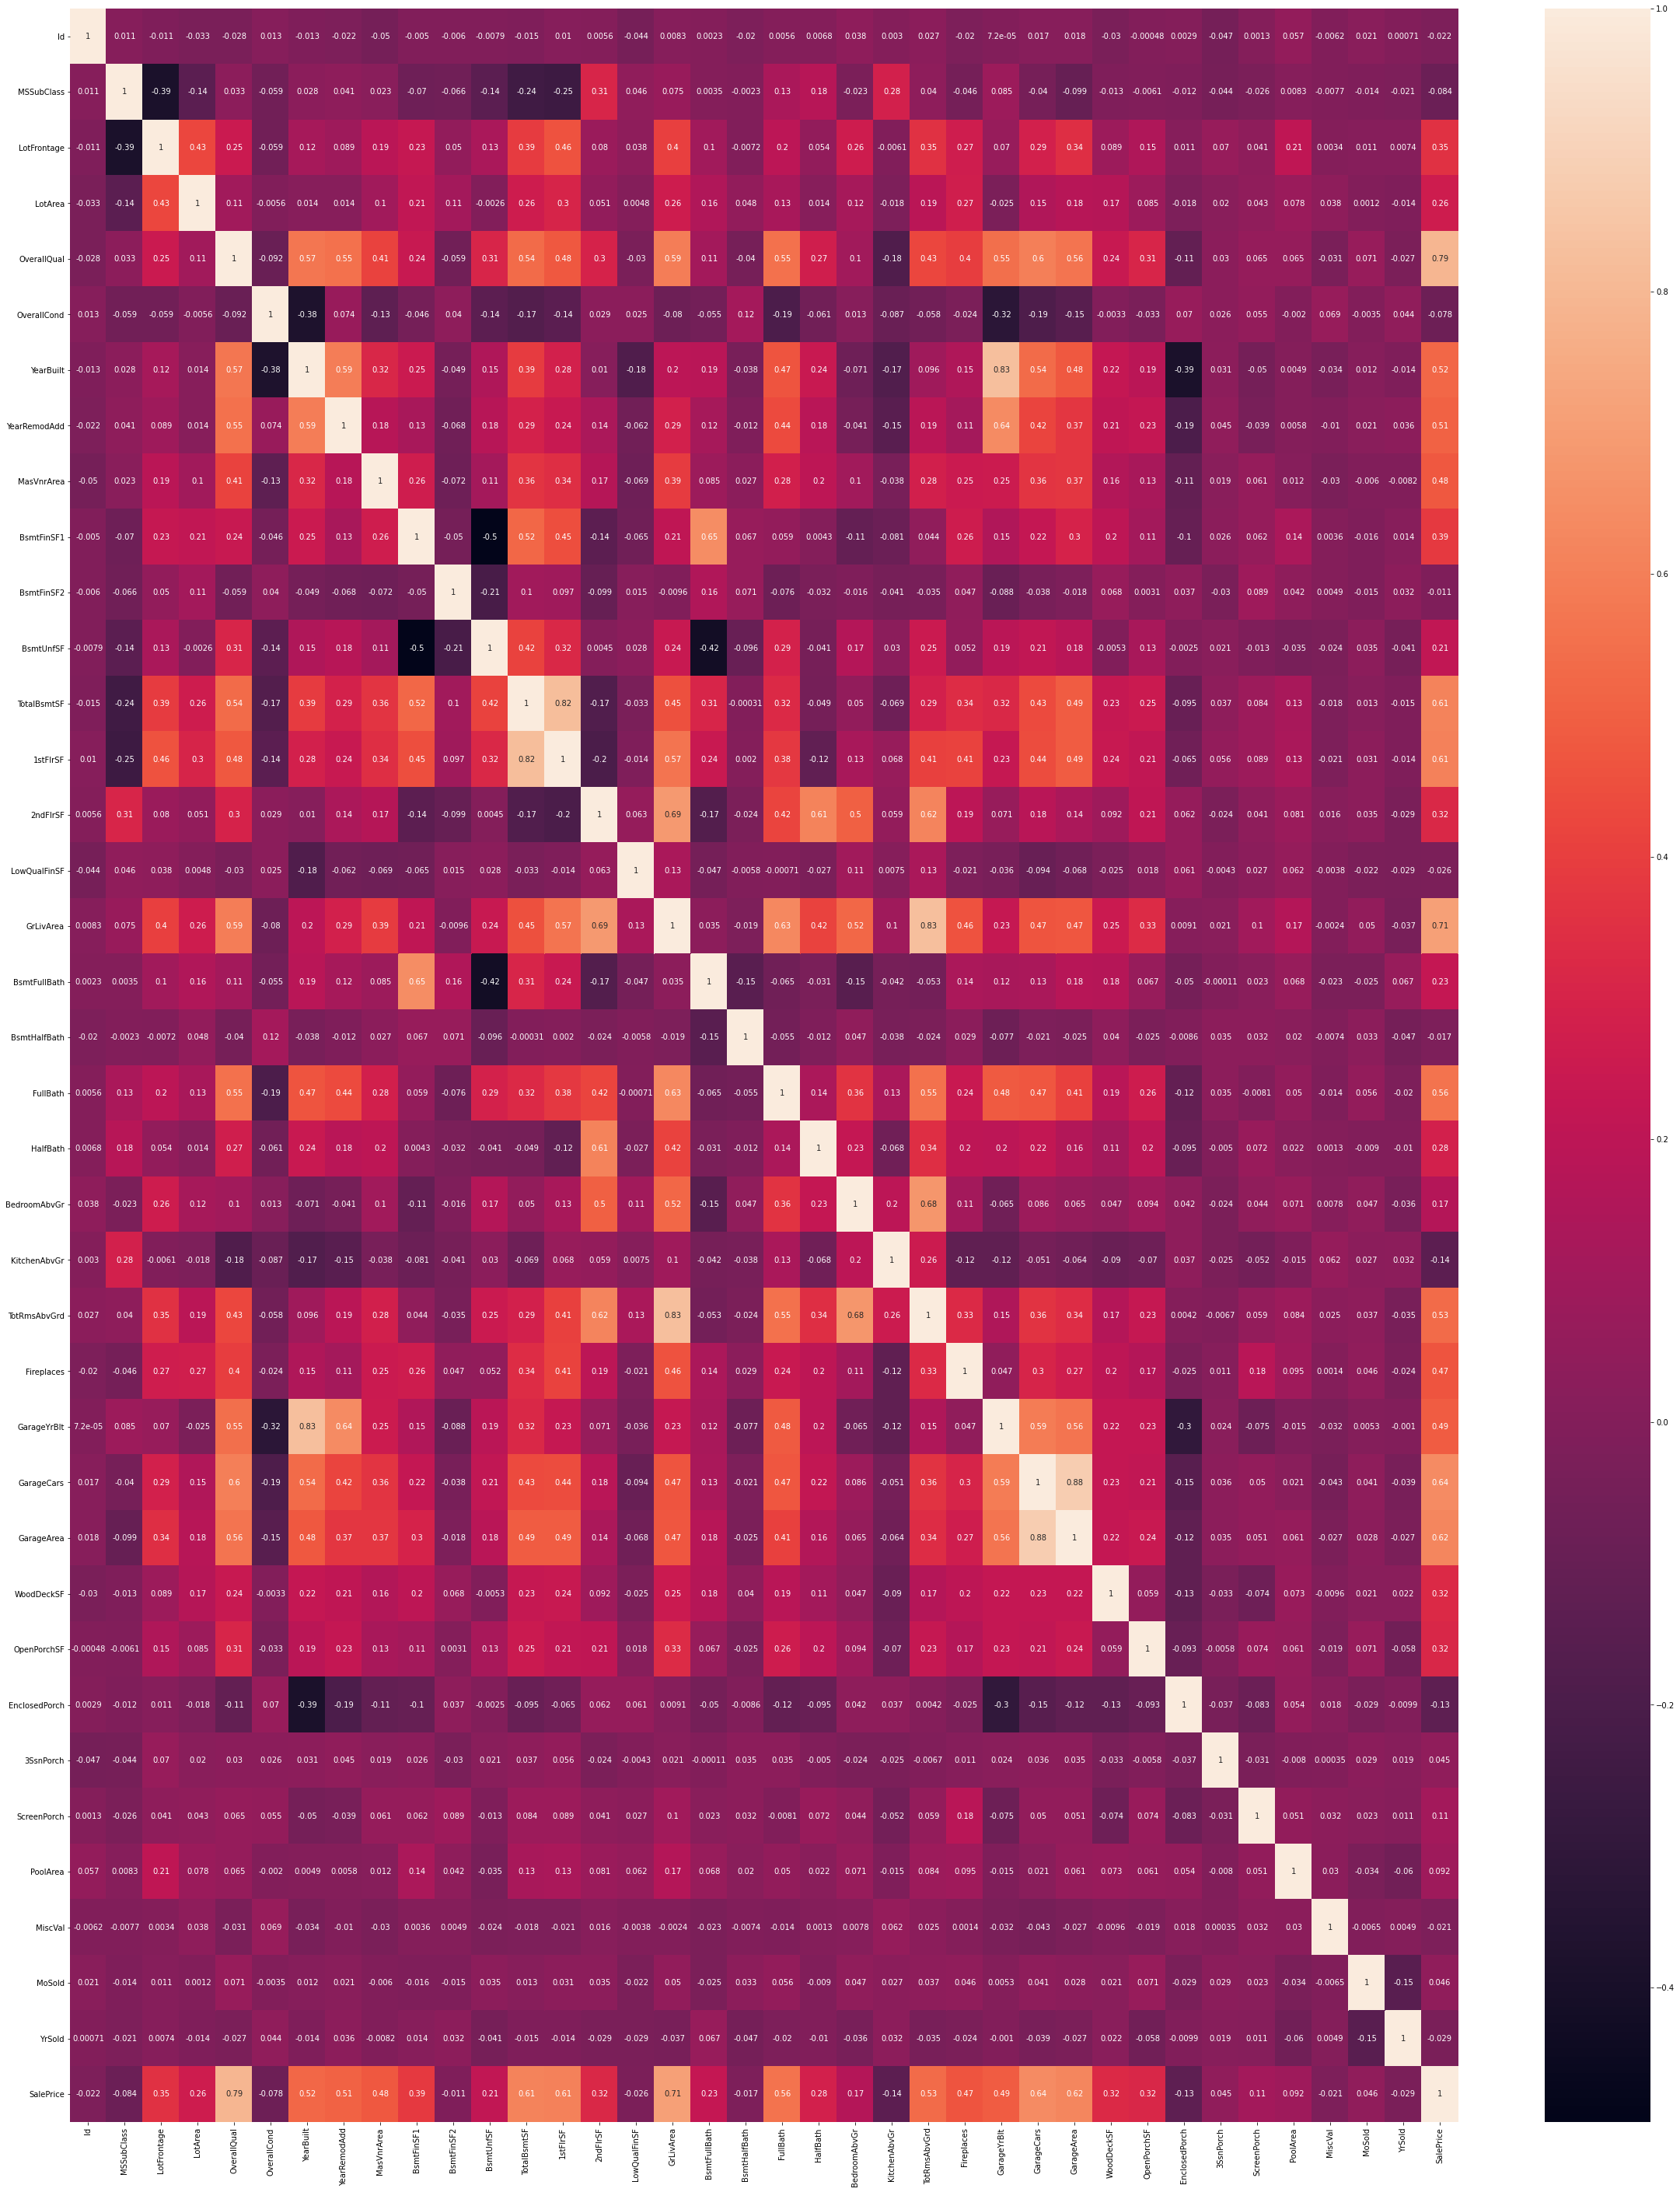

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(40,50))
sns.heatmap(train_data.corr(),annot=True);

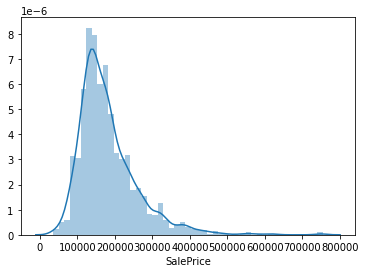

In [0]:
sns.distplot(train_data['SalePrice']);

<BarContainer object of 1460 artists>

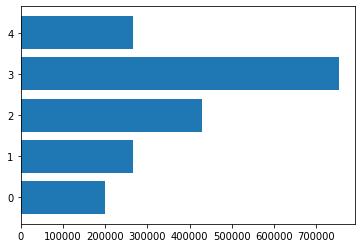

In [0]:
plt.barh(train_data["GarageCars"],train_data["SalePrice"])

<BarContainer object of 1460 artists>

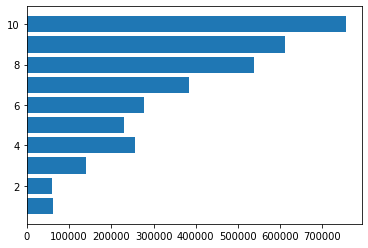

In [0]:
plt.barh(train_data["OverallQual"],train_data["SalePrice"])

In [0]:
new_train_df = train_data[['OverallQual','GrLivArea','GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'SalePrice']]

In [0]:
train_data[['OverallQual','GrLivArea','GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'SalePrice']] = train_data[['OverallQual','GrLivArea','GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'SalePrice']].fillna(0)

In [0]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
X_data = train_data[['OverallQual','GrLivArea','GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea']]
Y_data = train_data['SalePrice']
x_train_data, x_test_data, y_train_data, y_test_data = model_selection.train_test_split(X_data, Y_data, random_state=1, test_size=0.3333)

In [0]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(x_train_data, y_train_data)

0.7691549339483614

In [0]:
regression_prediction = regression_model.predict(x_test_data)

In [0]:
print('Prediction of the houses: {0}', regression_prediction)

Prediction of the houses: {0} [219307.44244872 162089.19795508 100667.73023549  54405.94540219
 142221.11495715 301853.22872475 289710.63198292 167597.89832001
 218623.79333326 225931.09057733 177280.86869018    908.26143214
 235569.3206271  341964.0038389  242131.3417502   98614.41134589
  95900.67135959 138683.50479943 214306.9608477  141032.81654902
 116278.69724282 134663.30073329 247004.57227921 329015.43899344
 117335.755313   206789.43976922 147888.82996245 197959.43393824
 369634.02649958 148866.61334624 160554.4370022  136669.84128793
  99638.69639486  68816.75600213 174670.1812013  334553.47244095
 143067.57810114  55537.65166637 261158.72659878  99198.5612364
 150778.94805964 143741.10482267  98549.0674833  121040.21185397
 186517.84618066 195636.85405316 128426.6416431  198518.89711121
 259136.02165464 249934.94223458  82836.46860149 282173.44748379
  95893.45117303 245310.96795719 209789.13089305  82135.04076376
 103364.13841312 201819.25252307 105716.92219757 194369.14692

In [0]:
regression_model.score(x_train_data, y_train_data)

0.7691549339483614